In [1]:
from sklearn.decomposition import PCA # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_Benign1 = "Updated data/Benign_1.csv"
Benign1_data = pd.read_csv(file_path_Benign1)
total_data = pd.read_csv(file_path_Benign1)

file_path_Benign2 = "Updated data/Benign_2.csv"
Benign2_data = pd.read_csv(file_path_Benign2)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign2)]) 

file_path_Benign3 = "Updated data/Benign_3.csv"
Benign3_data = pd.read_csv(file_path_Benign3)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign3)])

file_path_Benign4 = "Updated data/Benign_4.csv"
Benign4_data = pd.read_csv(file_path_Benign4)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign4)])

file_path_Botnet = "Updated data/Botnet_ARES.csv"
Botnet_data = pd.read_csv(file_path_Botnet)
total_data = pd.concat([total_data, pd.read_csv(file_path_Botnet)])

file_path_Brute = "Updated data/Brute_Force.csv"
Brute_data = pd.read_csv(file_path_Brute)
total_data = pd.concat([total_data, pd.read_csv(file_path_Brute)])

file_path_Dos = "Updated data/Dos_DDos.csv"
Dos_data = pd.read_csv(file_path_Dos)
total_data = pd.concat([total_data, pd.read_csv(file_path_Dos)])

file_path_Infiltration = "Updated data/Infiltration.csv"
Infil_data = pd.read_csv(file_path_Infiltration)
total_data = pd.concat([total_data, pd.read_csv(file_path_Infiltration)])

file_path_Web = "Updated data/Web_Attack.csv"
Web_data = pd.read_csv(file_path_Web)
total_data = pd.concat([total_data, pd.read_csv(file_path_Web)])

total_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,-1,1,1,6,187,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,443,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,443,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,443,-1,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
print("total_data", total_data.shape)
print("Benign1_data", Benign1_data.shape)
print("Benign2_data", Benign2_data.shape)
print("Benign3_data", Benign3_data.shape)
print("Benign4_data", Benign3_data.shape)
print("Botnet_data", Botnet_data.shape)
print("Brute_data", Brute_data.shape)
print("Dos_data", Dos_data.shape)
print("Infil_data", Infil_data.shape)
print("Web_data", Web_data.shape)

total_data (2669106, 79)
Benign1_data (754491, 79)
Benign2_data (645365, 79)
Benign3_data (431813, 79)
Benign4_data (431813, 79)
Botnet_data (1956, 79)
Brute_data (13832, 79)
Dos_data (379750, 79)
Infil_data (36, 79)
Web_data (2180, 79)


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669106 entries, 0 to 2179
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flo

In [5]:
total_data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,...,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06,2.669106e+06
mean,8.028386e+03,1.430321e+07,7.604651e+02,7.615879e+02,1.254050e+03,1.738759e+04,9.255659e+02,7.684381e+02,7.987327e+02,8.059143e+02,...,5.745901e+00,-2.909655e+03,8.648591e+04,4.362495e+04,1.624547e+05,6.182228e+04,8.814902e+06,5.343523e+05,9.217604e+06,8.394916e+06
std,1.852173e+04,3.349254e+07,6.300176e+03,6.336363e+03,1.197389e+04,2.330580e+06,6.252241e+03,6.251866e+03,6.249232e+03,6.249490e+03,...,6.554115e+02,1.117359e+06,6.676246e+05,4.049836e+05,1.055712e+06,5.941195e+05,2.423901e+07,4.738588e+06,2.499249e+07,2.397183e+07
min,0.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.370000e+02,2.000000e+00,1.000000e+00,1.800000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.063700e+04,2.000000e+00,2.000000e+00,7.400000e+01,1.280000e+02,4.400000e+01,6.000000e+00,4.000000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,9.056340e+05,8.000000e+00,6.000000e+00,3.260000e+02,4.520000e+02,2.010000e+02,4.300000e+01,5.800000e+01,8.000000e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


# PCA

## Total Data

In [6]:
# Drop "Label" column from the complete data
(total_data.iloc[:,:-1]).head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,-1,1,1,6,187,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,443,-1,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,443,-1,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,443,-1,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,443,-1,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0


In [7]:
# Keep 99% information of the data
pca = PCA(n_components = 0.99)
data_pca = pca.fit_transform(total_data.iloc[:,:-1])
data_pca.shape

(2669106, 8)

In [8]:
principalDf = pd.DataFrame(data = data_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'])
principalDf = principalDf.reset_index(drop = True)
total_data = total_data.reset_index(drop = True)
principalDf = pd.concat([principalDf, total_data.iloc[:,-1]], axis = 1)
principalDf.head()

,c1,c2,c3,c4,c5,c6,c7,c8,Label
0,-2.999762e+07,-1.734356e+04,-10222.247315,-1.948509e+08,1.740212e+06,-623518.032979,-908493.444472,-220054.623386,BENIGN
1,-3.185887e+07,-2.420522e+06,-33711.855412,-1.387933e+07,9.806246e+05,-402977.146003,-634586.482151,-153554.835480,BENIGN
2,-3.185887e+07,-2.420522e+06,-33711.855333,-1.387933e+07,9.806246e+05,-402977.148683,-634586.479331,-153554.838710,BENIGN
3,-3.185887e+07,-2.420522e+06,-33711.855385,-1.387933e+07,9.806246e+05,-402977.144030,-634586.482033,-153554.835658,BENIGN
4,-3.185887e+07,-2.420522e+06,-33711.856296,-1.387933e+07,9.806246e+05,-402977.089211,-634586.467566,-153554.482011,BENIGN


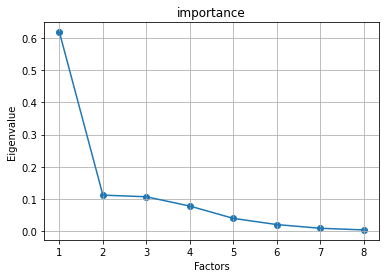

Numbers of components: 8
PCA components shape: (8, 78)


In [9]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1, len(importance)+1),importance)
plt.plot(range(1, len(importance)+1),importance)
plt.title('importance')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

print("Numbers of components: {}".format(pca.n_components_))
print("PCA components shape:", (pca.components_).shape)

In [10]:
explained_variance_need = np.array([pca.explained_variance_])
component_need = np.array(pca.components_)
print("explained_variance_need shape: ", explained_variance_need.shape)
print("component_need shape: ", component_need.shape)
column_names = list(total_data)
weights = np.divide(np.dot(explained_variance_need, component_need), np.sum(component_need, axis = 0), out = np.zeros_like(np.dot(explained_variance_need, component_need)), where=np.sum(component_need, axis = 0)!=0)
weights = weights/np.sum(weights)
df_weights = pd.DataFrame({"columns": column_names[:-1], "weights": weights[0].tolist()})
df_weights.sort_values(by="weights", ascending=False)

explained_variance_need shape:  (1, 8)
component_need shape:  (8, 78)


,columns,weights
76,Idle Max,0.594708
6,Fwd Packet Length Max,0.161476
8,Fwd Packet Length Mean,0.083890
70,Active Mean,0.078198
9,Fwd Packet Length Std,0.075508
...,...,...
18,Flow IAT Max,-0.029296
20,Fwd IAT Total,-0.030967
63,Subflow Fwd Bytes,-0.032367
27,Bwd IAT Std,-0.047578


## Benign 1

In [11]:
pca_benign1 = PCA(n_components = 0.99)
benign1_pca = pca_benign1.fit_transform(Benign1_data.iloc[:,:-1])
print("benign1_pca shape: ", benign1_pca.shape)

benign1_pca shape:  (754491, 9)


In [12]:
Benign1_pcaDf = pd.DataFrame(data = benign1_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
Benign1_pcaDf = Benign1_pcaDf.reset_index(drop = True)
Benign1_data = Benign1_data.reset_index(drop = True)
Benign1_pcaDf = pd.concat([Benign1_pcaDf, Benign1_data.iloc[:,-1]], axis = 1)
Benign1_pcaDf.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,Label
0,-1.855874e+07,-1.945066e+08,1.001830e+07,492191.922653,-682568.243641,-599476.839976,119013.808673,14682.651619,-26017.660650,BENIGN
1,-2.083397e+07,-1.372672e+07,1.416349e+06,331810.078103,-469531.018700,-420720.197755,82885.079429,-2821.109122,-20285.933068,BENIGN
2,-2.083397e+07,-1.372672e+07,1.416349e+06,331810.080710,-469531.015577,-420720.199567,82885.081190,-2821.109140,-20285.932337,BENIGN
3,-2.083397e+07,-1.372672e+07,1.416349e+06,331810.080522,-469531.014447,-420720.198292,82885.081606,-2821.109116,-20285.936379,BENIGN
4,-2.083398e+07,-1.372672e+07,1.416349e+06,331810.128478,-469530.872189,-420720.036798,82885.179469,-2821.104543,-20286.505511,BENIGN


In [13]:
explained_variance_benign1 = np.array([pca_benign1.explained_variance_])
component_benign1 = np.array(pca_benign1.components_)
print("explained_variance shape: ", explained_variance_benign1.shape)
print("component shape: ", component_benign1.shape)
a, b = np.dot(explained_variance_benign1, component_benign1), np.sum(component_benign1, axis = 0)
benign1_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign1_weights = benign1_weights/np.sum(benign1_weights)
df_weights_benign1 = pd.DataFrame({"columns": column_names[:-1], "weights": benign1_weights[0].tolist()})
df_weights_benign1.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 9)
component shape:  (9, 78)


,columns,weights
74,Idle Mean,0.624105
66,Init_Win_bytes_forward,0.489967
22,Fwd IAT Std,0.294143
29,Bwd IAT Min,0.161795
76,Idle Max,0.094797
...,...,...
77,Idle Min,-0.118953
40,Packet Length Mean,-0.140838
25,Bwd IAT Total,-0.148435
42,Packet Length Variance,-0.160310


## Benign 2

In [14]:
pca_benign2 = PCA(n_components = 0.99)
benign2_pca = pca_benign2.fit_transform(Benign2_data.iloc[:,:-1])
print("benign2_pca shape: ", benign2_pca.shape)

benign2_pca shape:  (645365, 6)


In [15]:
Benign2_pcaDf = pd.DataFrame(data = benign2_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Benign2_pcaDf = Benign2_pcaDf.reset_index(drop = True)
Benign2_data = Benign2_data.reset_index(drop = True)
Benign2_pcaDf = pd.concat([Benign2_pcaDf, Benign2_data.iloc[:,-1]], axis = 1)
Benign2_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-1.631466e+07,-2.629579e+08,1.878542e+06,-514645.802910,-872831.601281,-133590.822258,BENIGN
1,-1.984525e+07,-1.398821e+07,5.448516e+05,-313632.676023,-549084.878538,-84290.907330,BENIGN
2,-1.984525e+07,-1.398821e+07,5.448516e+05,-313632.680162,-549084.871474,-84290.886818,BENIGN
3,-1.984525e+07,-1.398821e+07,5.448516e+05,-313632.681348,-549084.897308,-84290.910815,BENIGN
4,-1.984525e+07,-1.398821e+07,5.448516e+05,-313632.681697,-549084.901952,-84290.914633,BENIGN


In [16]:
explained_variance_benign2 = np.array([pca_benign2.explained_variance_])
component_benign2 = np.array(pca_benign2.components_)
print("explained_variance shape: ", explained_variance_benign2.shape)
print("component shape: ", component_benign2.shape)
a, b = np.dot(explained_variance_benign2, component_benign2), np.sum(component_benign2, axis = 0)
benign2_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign2_weights = benign2_weights/np.sum(benign2_weights)
df_weights_benign2 = pd.DataFrame({"columns": column_names[:-1], "weights": benign2_weights[0].tolist()})
df_weights_benign2.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
77,Idle Min,0.346563
63,Subflow Fwd Bytes,0.074303
4,Total Length of Fwd Packets,0.073554
24,Fwd IAT Min,0.046205
10,Bwd Packet Length Max,0.040491
...,...,...
48,URG Flag Count,-0.007115
29,Bwd IAT Min,-0.009611
26,Bwd IAT Mean,-0.022870
72,Active Max,-0.038203


## Benign 3

In [17]:
pca_benign3 = PCA(n_components = 0.99)
benign3_pca = pca_benign3.fit_transform(Benign3_data.iloc[:,:-1])
print("benign3_pca shape: ", benign3_pca.shape)

benign3_pca shape:  (431813, 6)


In [18]:
Benign3_pcaDf = pd.DataFrame(data = benign3_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Benign3_pcaDf = Benign3_pcaDf.reset_index(drop = True)
Benign3_data = total_data.reset_index(drop = True)
Benign3_pcaDf = pd.concat([Benign3_pcaDf, Benign3_data.iloc[:,-1]], axis = 1)
Benign3_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-226448.151695,-2.065058e+07,698004.896857,-1.628699e+06,-116857.288815,-648316.986891,BENIGN
1,-226408.924631,-2.064871e+07,697571.694698,-1.641172e+06,-116590.173346,-645205.695534,BENIGN
2,-226408.972946,-2.064872e+07,697572.369547,-1.641138e+06,-116590.653965,-645223.794438,BENIGN
3,-226408.957082,-2.064872e+07,697572.965777,-1.641152e+06,-116590.998895,-645215.019774,BENIGN
4,-226439.049981,-2.064909e+07,697647.909905,-1.638824e+06,-116643.063380,-645793.495878,BENIGN


In [19]:
explained_variance_benign3 = np.array([pca_benign3.explained_variance_])
component_benign3 = np.array(pca_benign3.components_)
print("explained_variance shape: ", explained_variance_benign3.shape)
print("component shape: ", component_benign3.shape)
a, b = np.dot(explained_variance_benign3, component_benign3), np.sum(component_benign3, axis = 0)
benign3_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign3_weights = benign3_weights/np.sum(benign3_weights)
df_weights_benign3 = pd.DataFrame({"columns": column_names[:-1], "weights": benign3_weights[0].tolist()})
df_weights_benign3.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
24,Fwd IAT Min,0.321936
34,Fwd Header Length,0.056104
55,Fwd Header Length.1,0.056104
69,min_seg_size_forward,0.049321
1,Flow Duration,0.038298
...,...,...
47,ACK Flag Count,-0.009807
67,Init_Win_bytes_backward,-0.010732
29,Bwd IAT Min,-0.013665
26,Bwd IAT Mean,-0.022117


## Benign 4

In [20]:
pca_benign4 = PCA(n_components = 0.99)
benign4_pca = pca_benign4.fit_transform(Benign4_data.iloc[:,:-1])
print("benign4_pca shape: ", benign4_pca.shape)

benign4_pca shape:  (439683, 6)


In [21]:
Benign4_pcaDf = pd.DataFrame(data = benign4_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Benign4_pcaDf = Benign4_pcaDf.reset_index(drop = True)
Benign4_data = Benign4_data.reset_index(drop = True)
Benign4_pcaDf = pd.concat([Benign4_pcaDf, Benign4_data.iloc[:,-1]], axis = 1)
Benign4_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-2.282009e+07,-1.493707e+07,1.090717e+06,-1785.210694,-668488.432238,-176718.649629,BENIGN
1,-2.282009e+07,-1.493707e+07,1.090712e+06,-1789.422242,-668458.898839,-176728.144027,BENIGN
2,-2.282009e+07,-1.493707e+07,1.090716e+06,-1786.286485,-668481.064734,-176721.283356,BENIGN
3,-2.282009e+07,-1.493707e+07,1.090717e+06,-1785.210999,-668488.495882,-176718.728681,BENIGN
4,-2.282009e+07,-1.493707e+07,1.090717e+06,-1785.265872,-668488.579513,-176718.725400,BENIGN


In [22]:
explained_variance_benign4 = np.array([pca_benign4.explained_variance_])
component_benign4 = np.array(pca_benign4.components_)
print("explained_variance shape: ", explained_variance_benign4.shape)
print("component shape: ", component_benign4.shape)
a, b = np.dot(explained_variance_benign4, component_benign4), np.sum(component_benign4, axis = 0)
benign4_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign4_weights = benign4_weights/np.sum(benign4_weights)
df_weights_benign4 = pd.DataFrame({"columns": column_names[:-1], "weights": benign4_weights[0].tolist()})
df_weights_benign4.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
27,Bwd IAT Std,0.872673
74,Idle Mean,0.761269
25,Bwd IAT Total,0.449584
8,Fwd Packet Length Mean,0.229281
53,Avg Fwd Segment Size,0.229281
...,...,...
46,PSH Flag Count,-0.179427
1,Flow Duration,-0.220299
20,Fwd IAT Total,-0.224410
76,Idle Max,-0.354843


## Botnet

In [23]:
pca_Botnet = PCA(n_components = 0.99)
Botnet_pca = pca_Botnet.fit_transform(Botnet_data.iloc[:,:-1])
print("Botnet_pca shape: ", Botnet_pca.shape)

Botnet_pca shape:  (1956, 4)


In [24]:
Botnet_pcaDf = pd.DataFrame(data = Botnet_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Botnet_pcaDf = Botnet_pcaDf.reset_index(drop = True)
Botnet_data = Botnet_data.reset_index(drop = True)
Botnet_pcaDf = pd.concat([Botnet_pcaDf, Botnet_data.iloc[:,-1]], axis = 1)
Botnet_pcaDf.head()

,c1,c2,c3,c4,Label
0,-6.261115e+05,-2.416272e+05,-2.502633e+05,3.217629e+05,BotnetARES
1,-6.310837e+05,-2.416304e+05,-2.500275e+05,3.238832e+05,BotnetARES
2,1.025303e+08,1.076752e+06,1.845014e+06,2.916858e+06,BotnetARES
3,1.081927e+08,1.164545e+06,2.025951e+06,3.422571e+06,BotnetARES
4,1.460023e+06,-2.517618e+05,-3.637913e+05,-8.069966e+05,BotnetARES


In [25]:
explained_variance_Botnet = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
34,Fwd Header Length,0.255665
55,Fwd Header Length.1,0.255665
20,Fwd IAT Total,0.064264
25,Bwd IAT Total,0.057012
1,Flow Duration,0.057006
...,...,...
16,Flow IAT Mean,-0.019943
17,Flow IAT Std,-0.022513
18,Flow IAT Max,-0.031729
23,Fwd IAT Max,-0.032198


## Brute

In [26]:
pca_Brute = PCA(n_components = 0.99)
Brute_pca = pca_Brute.fit_transform(Brute_data.iloc[:,:-1])
print("Brute_pca shape: ", Brute_pca.shape)

Brute_pca shape:  (13832, 3)


In [27]:
Brute_pcaDf = pd.DataFrame(data = Brute_pca, columns = ['c1', 'c2', 'c3'])
Brute_pcaDf = Brute_pcaDf.reset_index(drop = True)
Brute_data = Brute_data.reset_index(drop = True)
Brute_pcaDf = pd.concat([Brute_pcaDf, Brute_data.iloc[:,-1]], axis = 1)
Brute_pcaDf.head()

,c1,c2,c3,Label
0,-8.751006e+06,100859.988896,-896099.551438,BruteForce
1,-8.752640e+06,101597.878608,-876762.298806,BruteForce
2,-8.751779e+06,101050.353263,-891466.538941,BruteForce
3,-8.751708e+06,101017.444268,-892538.032761,BruteForce
4,-8.751852e+06,101088.324324,-890328.433419,BruteForce


In [28]:
explained_variance_Brute = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
34,Fwd Header Length,0.255665
55,Fwd Header Length.1,0.255665
20,Fwd IAT Total,0.064264
25,Bwd IAT Total,0.057012
1,Flow Duration,0.057006
...,...,...
16,Flow IAT Mean,-0.019943
17,Flow IAT Std,-0.022513
18,Flow IAT Max,-0.031729
23,Fwd IAT Max,-0.032198


## Dos

In [29]:
pca_Dos = PCA(n_components = 0.99)
Dos_pca = pca_Dos.fit_transform(Dos_data.iloc[:,:-1])
print("Dos_pca shape: ", Dos_pca.shape)

Dos_pca shape:  (379750, 6)


In [30]:
Dos_pcaDf = pd.DataFrame(data = Dos_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Dos_pcaDf = Dos_pcaDf.reset_index(drop = True)
Dos_data = Dos_data.reset_index(drop = True)
Dos_pcaDf = pd.concat([Dos_pcaDf, Dos_data.iloc[:,-1]], axis = 1)
Dos_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-1.017613e+08,2.472294e+06,-2.880249e+06,-621742.074053,4.721847e+06,-884924.743471,DoS
1,-1.061161e+08,3.199787e+06,-3.653047e+06,-642818.290725,3.165488e+06,474054.068272,DoS
2,-1.061165e+08,3.199836e+06,-3.652872e+06,-642816.344704,3.164620e+06,473307.308521,DoS
3,-1.061171e+08,3.199900e+06,-3.652659e+06,-642814.026022,3.163542e+06,472391.642622,DoS
4,-1.061177e+08,3.199959e+06,-3.652434e+06,-642811.442311,3.162446e+06,471435.274570,DoS


In [31]:
explained_variance_Dos = np.array([pca_Dos.explained_variance_])
component_Dos = np.array(pca_Dos.components_)
print("explained_variance shape: ", explained_variance_Dos.shape)
print("component shape: ", component_Dos.shape)
a, b = np.dot(explained_variance_Dos, component_Dos), np.sum(component_Dos, axis = 0)
Dos_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Dos_weights = Dos_weights/np.sum(Dos_weights)
df_weights_Dos = pd.DataFrame({"columns": column_names[:-1], "weights": Dos_weights[0].tolist()})
df_weights_Dos.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
34,Fwd Header Length,2.303872
55,Fwd Header Length.1,2.303872
46,PSH Flag Count,2.136612
1,Flow Duration,1.154444
43,FIN Flag Count,0.882445
...,...,...
2,Total Fwd Packets,-0.446302
3,Total Backward Packets,-0.509816
22,Fwd IAT Std,-0.716053
6,Fwd Packet Length Max,-0.782319


## Infiltration

In [32]:
pca_Infil = PCA(n_components = 0.99)
Infil_pca = pca_Infil.fit_transform(Infil_data.iloc[:,:-1])
print("Infil_pca shape: ", Infil_pca.shape)

Infil_pca shape:  (36, 6)


In [33]:
Infil_pcaDf = pd.DataFrame(data = Infil_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Infil_pcaDf = Infil_pcaDf.reset_index(drop = True)
Infil_data = Infil_data.reset_index(drop = True)
Infil_pcaDf = pd.concat([Infil_pcaDf, Infil_data.iloc[:,-1]], axis = 1)
Infil_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-2.497286e+07,-8.407416e+07,8.693553e+07,5.064429e+07,-3.037186e+06,3.755863e+07,Infiltration
1,-8.959326e+07,-2.737427e+07,-3.241394e+07,-2.821735e+07,-1.203095e+07,3.341613e+07,Infiltration
2,-1.440449e+08,-2.841809e+07,1.154488e+06,-2.473300e+06,-2.103291e+06,-1.179031e+07,Infiltration
3,-1.449700e+08,-3.389069e+07,3.938621e+06,2.357420e+06,-2.391661e+06,-7.322066e+06,Infiltration
4,-8.148679e+07,-2.522310e+07,-3.604875e+07,-3.065349e+07,-1.233067e+07,3.723678e+07,Infiltration


In [34]:
explained_variance_Infil = np.array([pca_Infil.explained_variance_])
component_Infil = np.array(pca_Infil.components_)
print("explained_variance shape: ", explained_variance_Infil.shape)
print("component shape: ", component_Infil.shape)
a, b = np.dot(explained_variance_Infil, component_Infil), np.sum(component_Infil, axis = 0)
Infil_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Infil_weights = Infil_weights/np.sum(Infil_weights)
df_weights_Infil = pd.DataFrame({"columns": column_names[:-1], "weights": Infil_weights[0].tolist()})
df_weights_Infil.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
29,Bwd IAT Min,9.493378
74,Idle Mean,5.896511
25,Bwd IAT Total,5.304530
23,Fwd IAT Max,3.535587
8,Fwd Packet Length Mean,3.529653
...,...,...
77,Idle Min,-6.798728
54,Avg Bwd Segment Size,-7.832683
12,Bwd Packet Length Mean,-7.832683
39,Max Packet Length,-21.407333


## Web

In [35]:
pca_Web = PCA(n_components = 0.99)
Web_pca = pca_Web.fit_transform(Web_data.iloc[:,:-1])
print("Web_pca shape: ", Web_pca.shape)

Web_pca shape:  (2180, 3)


In [36]:
Web_pcaDf = pd.DataFrame(data = Web_pca, columns = ['c1', 'c2', 'c3'])
Web_pcaDf = Web_pcaDf.reset_index(drop = True)
Web_data = Web_data.reset_index(drop = True)
Web_pcaDf = pd.concat([Web_pcaDf, Web_data.iloc[:,-1]], axis = 1)
Web_pcaDf.head()

,c1,c2,c3,Label
0,-1.607776e+06,8.460191e+06,5.787192e+06,WebAttack
1,-2.537871e+06,1.530668e+06,-7.746302e+05,WebAttack
2,-7.912771e+06,9.701386e+06,-1.900772e+06,WebAttack
3,-2.191728e+06,1.228487e+06,-5.317868e+05,WebAttack
4,-2.638971e+06,1.200439e+06,-7.023216e+05,WebAttack


In [37]:
explained_variance_Web = np.array([pca_Web.explained_variance_])
component_Web = np.array(pca_Web.components_)
print("explained_variance shape: ", explained_variance_Web.shape)
print("component shape: ", component_Web.shape)
a, b = np.dot(explained_variance_Web, component_Web), np.sum(component_Web, axis = 0)
Web_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Web_weights = Infil_weights/np.sum(Web_weights)
df_weights_Web = pd.DataFrame({"columns": column_names[:-1], "weights": Web_weights[0].tolist()})
df_weights_Web.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 3)
component shape:  (3, 78)


,columns,weights
29,Bwd IAT Min,1.493292e-15
74,Idle Mean,9.275110e-16
25,Bwd IAT Total,8.343934e-16
23,Fwd IAT Max,5.561418e-16
8,Fwd Packet Length Mean,5.552083e-16
...,...,...
77,Idle Min,-1.069428e-15
54,Avg Bwd Segment Size,-1.232067e-15
12,Bwd Packet Length Mean,-1.232067e-15
39,Max Packet Length,-3.367337e-15


# LDA

In [38]:
np.unique(total_data.iloc[:,-1])

array(['BENIGN', 'BotnetARES', 'BruteForce', 'DoS', 'Infiltration',
       'WebAttack'], dtype=object)

In [39]:
# LDA: Number of components (<= min(n_classes - 1, n_features))
lda = LDA(n_components = 4)
data_lda = lda.fit_transform(total_data.iloc[:,:-1], total_data.iloc[:,-1])
data_lda.shape

(2669106, 4)

In [40]:
total_df = pd.DataFrame(data = data_lda, columns = ['c1', 'c2', 'c3', 'c4'])
total_df = total_df.reset_index(drop = True)
total_data = total_data.reset_index(drop = True)
total_df = pd.concat([total_df, total_data.iloc[:,-1]], axis = 1)
total_df.head()

,c1,c2,c3,c4,Label
0,-0.041275,1.714367,0.150859,2.470554,BENIGN
1,2.569671,1.286272,0.024140,2.262073,BENIGN
2,2.569639,1.286258,0.024141,2.262097,BENIGN
3,2.569565,1.285715,0.024301,2.257831,BENIGN
4,2.556535,1.206449,0.047401,1.644348,BENIGN


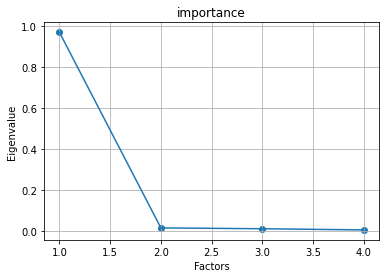

In [41]:
importance = lda.explained_variance_ratio_
plt.scatter(range(1, len(importance)+1),importance)
plt.plot(range(1, len(importance)+1),importance)
plt.title('importance')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()